In [1]:
from qiskit.circuit.library import ZZFeatureMap,PauliFeatureMap
from qiskit.primitives import Sampler
from qiskit.algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel,QuantumKernel

from qiskit import BasicAer
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit.algorithms.optimizers import COBYLA
from qiskit.circuit.library import TwoLocal
from qiskit_machine_learning.algorithms import VQC
#from qiskit_machine_learning.datasets import iris
from qiskit_machine_learning.circuit.library import RawFeatureVector
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from qiskit_machine_learning.algorithms import QSVC
backend = BasicAer.get_backend('qasm_simulator')
iris = load_iris()


print(iris.DESCR)

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [2]:
features = iris.data
labels = iris.target

In [3]:
from sklearn.preprocessing import MinMaxScaler

features = MinMaxScaler().fit_transform(features)

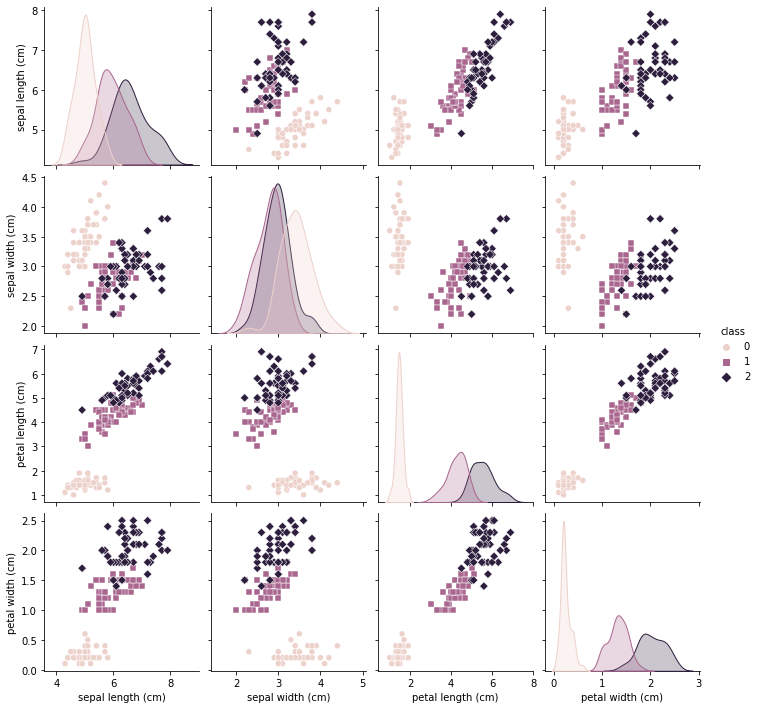

In [5]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["class"] = pd.Series(iris.target)

sns.pairplot(df, hue="class", markers=["o", "s", "D"])

In [13]:
seed = 1376
algorithm_globals.random_seed = seed
X, Y = iris.data, iris.target
print(X.shape)
print(len(set(Y)))
# Use Wine data set for training and test data
feature_dim = 4  # dimension of each data point
training_size =120
test_size = 30

# training features, training labels, test features, test labels as np.array,
# one hot encoding for labels
#training_features, training_labels, test_features, test_labels = \
#    iris(training_size=training_size, test_size=test_size, n=feature_dim)
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.1)



(150, 4)
3


In [39]:
import matplotlib.pyplot as plt
import numpy as np


def plot_features(ax, features, labels, class_label, marker, face, edge, label):
    # A train plot
    ax.scatter(
        # x coordinate of labels where class is class_label
        features[np.where(labels[:] == class_label), 0],
        # y coordinate of labels where class is class_label
        features[np.where(labels[:] == class_label), 1],
        marker=marker,
        facecolors=face,
        edgecolors=edge,
        label=label,
    )


def plot_dataset(train_x, train_y, test_x, test_y,iris):

    plt.figure(figsize=(10, 10))
    plt.ylim(0, 2 * np.pi)
    plt.xlim(0, 2 * np.pi)
    plt.imshow(
        np.asmatrix(iris),
        interpolation="nearest",
        origin="lower",
        cmap="RdBu",
        extent=[0, 2 * np.pi, 0, 2 * np.pi],
    )

    # A train plot
    plot_features(plt, train_x, train_y, 0, "s", "w", "b", "A train")

    # B train plot
    plot_features(plt, train_x, train_y, 1, "o", "w", "r", "B train")

    # A test plot
    plot_features(plt, test_x, test_y, 0, "s", "b", "w", "A test")

    # B test plot
    plot_features(plt, test_x, test_y, 1, "o", "r", "w", "B test")

    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
    plt.title("Iris dataset")

    plt.show()

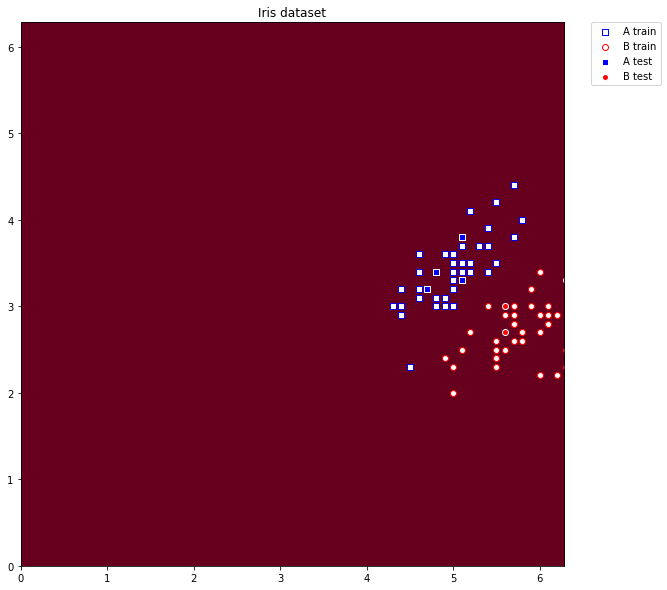

In [40]:
plot_dataset(train_x, train_y, test_x, test_y,"2")

In [5]:
#backend = BasicAer.get_backend('qasm_simulator'),
#                                           shots=1024,
#                                           seed_simulator=seed,
#                                           seed_transpiler=seed
feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=2, entanglement="linear")

sampler = Sampler()

fidelity = ComputeUncompute(sampler=sampler)

kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map)
print(feature_map.num_qubits)

qsvc=QSVC(quantum_kernel=kernel)
#t0=time()
qsvc.fit(train_x,train_y)
qsvc_score=qsvc.score(test_x,test_y)
print(f"QSVC classification test score: {qsvc_score}")
#print(f"Time taken :{t1-t0}")

4
QSVC classification test score: 0.9333333333333333
